In [14]:
# %load imports.py
%matplotlib inline
import sys
!{sys.executable} -m pip install --user numpy pandas matplotlib seaborn
import numpy, pandas, matplotlib, seaborn
import matplotlib.pyplot as pyplot
seaborn.set(style="darkgrid")


year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object
369 records with non-numeric profit column
year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object


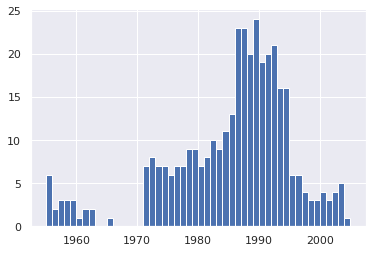

In [15]:
fortune500 = pd.read_csv("fortune500.csv")
assert len(fortune500)
fortune500.columns = ["year", "rank", "company", "revenue", "profit"]
print(f"{fortune500.dtypes}")
non_numeric_profits = fortune500.profit.str.contains("[^0-9.-]")
fortune500.loc[non_numeric_profits].head()
set(fortune500.profit[non_numeric_profits])
print(f"{len(fortune500.profit[non_numeric_profits])} records with non-numeric profit column")
bin_sizes, _, _ = pyplot.hist(fortune500.year[non_numeric_profits], bins=range(1955, 2006))
# Accept the irregularities of invalid profit value type and remove the records
fortune500 = fortune500.loc[~non_numeric_profits]
fortune500.profit = fortune500.profit.apply(pd.to_numeric)
assert len(fortune500)
print(f"{fortune500.dtypes}")

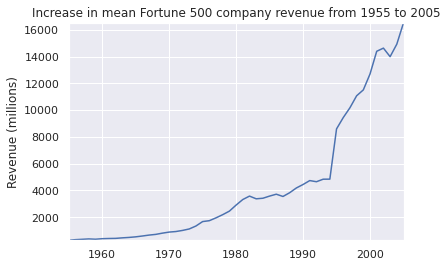

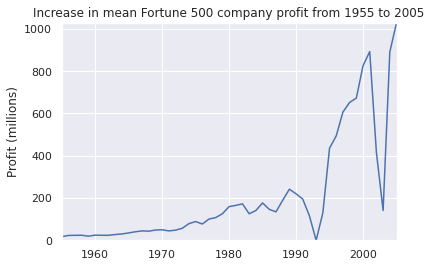

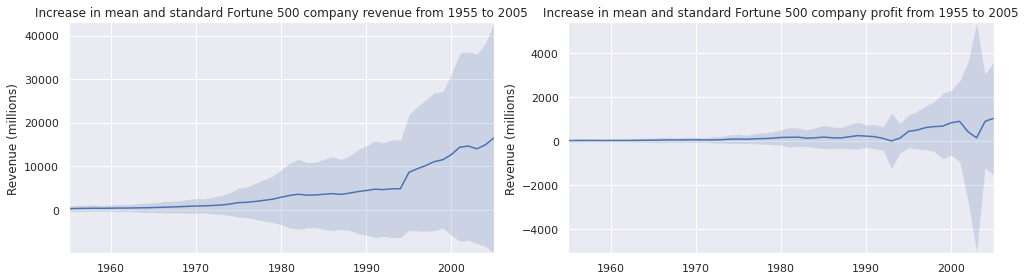

In [16]:
fortune500peryear = fortune500.loc[:, ["year", "revenue", "profit"]].groupby("year")
avgs = fortune500peryear.mean()
x = avgs.index
revenueperyear = avgs.revenue
profitperyear = avgs.profit
def plot(x, y, ax, title, ylabel):
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.plot(x, y)
    ax.margins(x=0, y=0)
def plot_standard_deviations(x, y, stds, ax, title, ylabel):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, ylabel)
fig, ax = pyplot.subplots()
plot(x, revenueperyear, ax, 'Increase in mean Fortune 500 company revenue from 1955 to 2005', 'Revenue (millions)')
fig, ax = pyplot.subplots()
plot(x, profitperyear, ax, 'Increase in mean Fortune 500 company profit from 1955 to 2005', 'Profit (millions)')
fig, (ax1, ax2) = pyplot.subplots(ncols=2)
title = "Increase in mean and standard Fortune 500 company {0} from 1955 to 2005"
stds1 = fortune500peryear.std().revenue.values
stds2 = fortune500peryear.std().profit.values
plot_standard_deviations(x, revenueperyear, stds1, ax1, title.format("revenue"), 'Revenue (millions)')
plot_standard_deviations(x, profitperyear, stds2, ax2, title.format("profit"), 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()